<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

<b> <font size='5'>  
ELEC PRICE PREDICTION CAPSTONE:</font>  

<font size='4'>EDA and Data Inspection</font> </b>

<font size='3'>  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Manu Kalia Project Submission<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; DSI-7-SF<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 15-May-2019<br>
</font>

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Function-Definitions" data-toc-modified-id="Function-Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Function Definitions</a></span></li><li><span><a href="#Unpickle-Dataframe" data-toc-modified-id="Unpickle-Dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Unpickle Dataframe</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li><li><span><a href="#Income-For-a-1-MW-Power-Plant" data-toc-modified-id="Income-For-a-1-MW-Power-Plant-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Income For a 1 MW Power Plant</a></span></li><li><span><a href="#Data-Visualization-...-time-series" data-toc-modified-id="Data-Visualization-...-time-series-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Visualization ... time series</a></span></li><li><span><a href="#Time-series-plots-with-one-week-rolling-averages" data-toc-modified-id="Time-series-plots-with-one-week-rolling-averages-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time series plots with one-week rolling averages</a></span></li></ul></div>

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import math

import pickle
import time
import glob
import pytz
from datetime import timedelta

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
 
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Function Definitions

In [3]:
#  2 x N subplots ...

def gen_linecharts(dataframe, list_of_columns, cols, file=None):
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    plt.subplots_adjust(bottom=0.00, top=1.00)

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

In [4]:
#  2 x N subplots with a user-specified rolling average...

def gen_linecharts_rolling(dataframe, roll_num, list_of_columns, cols, file=None):
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    dataframe = dataframe.rolling(roll_num).mean()

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    plt.subplots_adjust(bottom=0.00, top=1.00)

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

---

## Unpickle Dataframe

In [5]:
with open('../data/pre_processed_df.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00-08:00,30.38613,25.030977,24.903872,21515.00,22070.77,22188.26,21331.6250,6559389.0,156.0,26.0,...,16093.0,22000.0,94.0,72.0,16093.0,22000.0,2016,1,1,1
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.630057,20854.85,21419.40,21581.45,20648.3125,6840908.0,144.0,21.0,...,16093.0,22000.0,83.0,93.0,16093.0,22000.0,2016,1,1,2
2016-01-01 03:00:00-08:00,28.45127,24.775715,24.689828,20495.68,20997.22,21261.00,20389.0000,6557979.0,139.0,0.0,...,16093.0,22000.0,78.0,67.0,16093.0,22000.0,2016,1,1,3
2016-01-01 04:00:00-08:00,28.66504,24.923320,23.505206,20490.69,21008.41,21289.56,20443.8125,6534157.0,133.0,0.0,...,16093.0,22000.0,67.0,72.0,16093.0,22000.0,2016,1,1,4
2016-01-01 05:00:00-08:00,29.84836,25.353155,24.506423,20950.76,21464.04,21823.54,20868.1250,6556724.0,122.0,0.0,...,16093.0,22000.0,67.0,72.0,16093.0,22000.0,2016,1,1,5


In [6]:
df.shape

(29067, 28)

In [7]:
df.isna().sum().sum()

0

---

## Correlation Heatmap

''

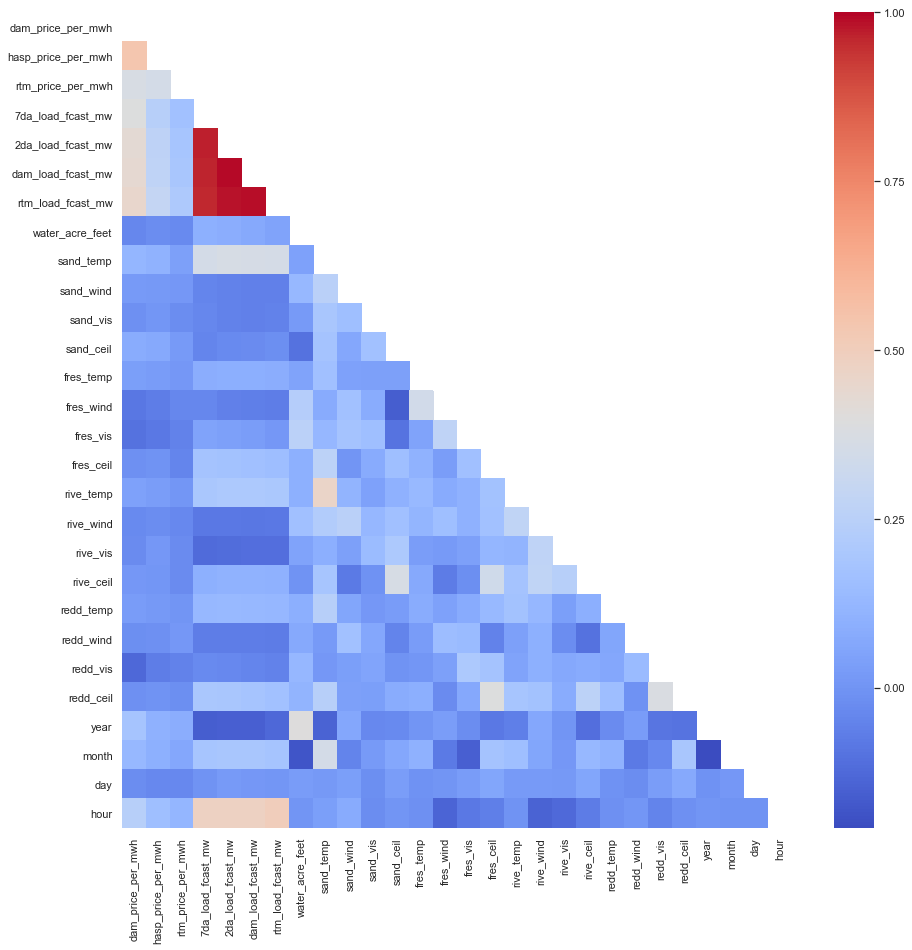

In [8]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df.corr(), mask=mask, annot=False, cmap='coolwarm')
plt.savefig('../images/corr_heatmap.jpg', bbox_inches='tight')
;

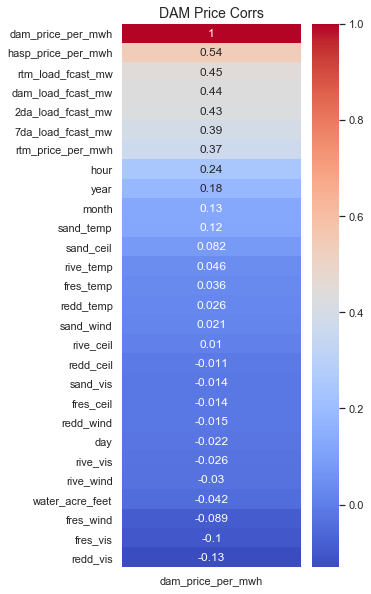

In [9]:
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['dam_price_per_mwh']].sort_values('dam_price_per_mwh', ascending=False),
            annot=True,
            cmap='coolwarm');
plt.title('DAM Price Corrs', fontsize=14)
plt.savefig('../images/dam_corr_heatmap.jpg', bbox_inches='tight')
plt.show();

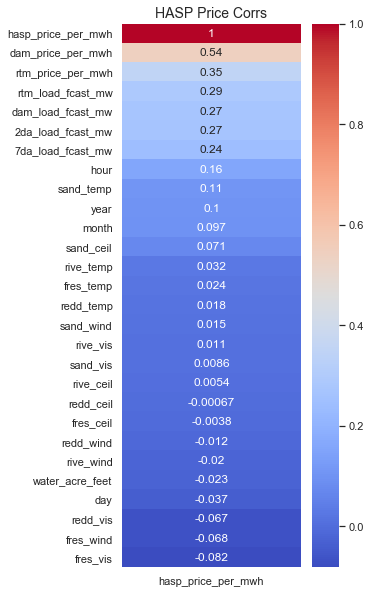

In [10]:
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['hasp_price_per_mwh']].sort_values('hasp_price_per_mwh', ascending=False),
            annot=True,
            cmap='coolwarm');
plt.title('HASP Price Corrs', fontsize=14)
plt.savefig('../images/hasp_corr_heatmap.jpg', bbox_inches='tight')
plt.show();

---

## Income For a 1 MW Power Plant

In [11]:
# Adapted timedelta method from StackOverflow
# https://stackoverflow.com/questions/42521107/python-pandas-find-number-of-years-between-two-dates

time_horiz_yrs = (df.index[-1] - df.index[0]) / timedelta(days=365)

print(time_horiz_yrs)

3.331164383561644


In [12]:
dam_ann_inc_1mw  = df.dam_price_per_mwh.sum() / time_horiz_yrs
hasp_ann_inc_1mw = df.hasp_price_per_mwh.sum() / time_horiz_yrs

In [13]:
print(dam_ann_inc_1mw)
print(hasp_ann_inc_1mw)

321000.09621461906
310395.96296790376


---

## Data Visualization ... time series

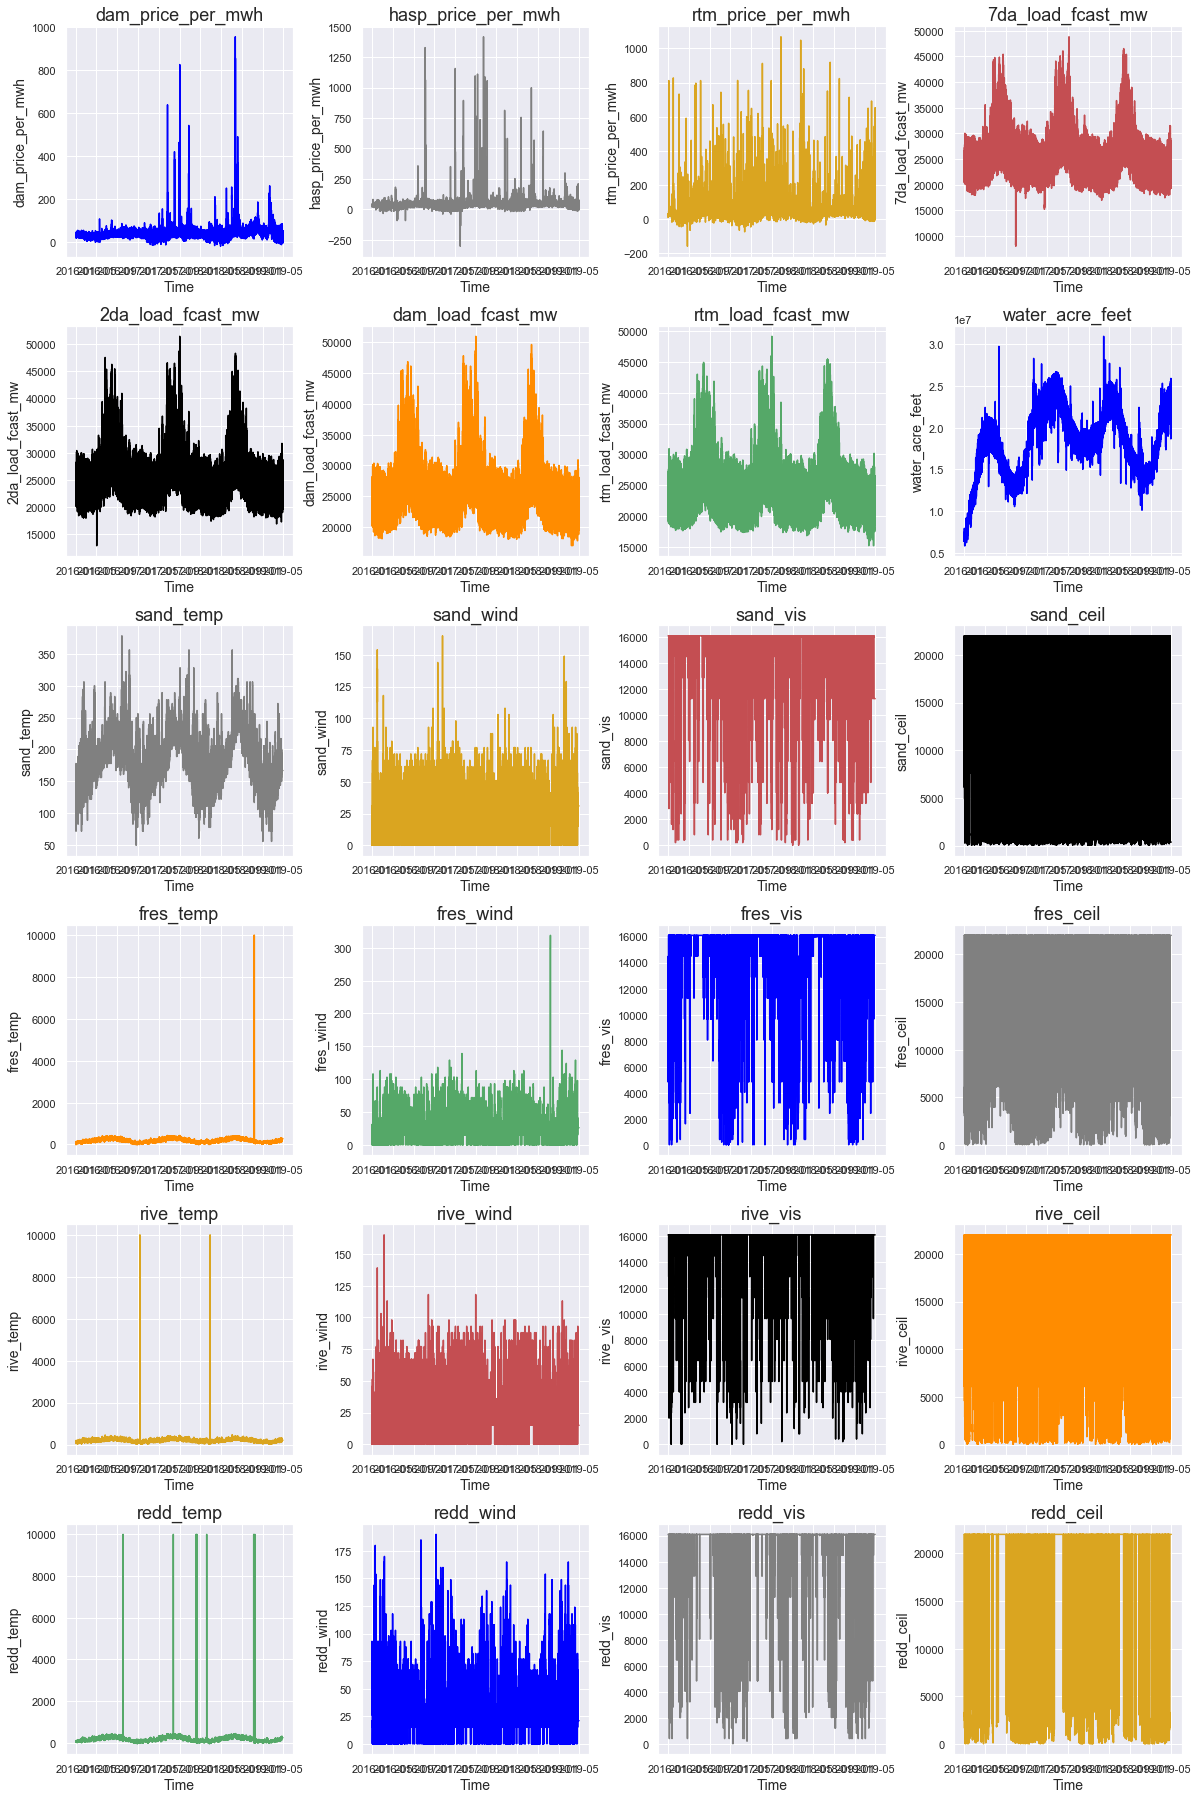

In [14]:
items_to_plot = df.columns[:24]
gen_linecharts(df, items_to_plot, 4, '../images/all_features_plots.jpg')

## Time series plots with one-week rolling averages

In [15]:
df = df.replace(to_replace=9999, method='ffill')

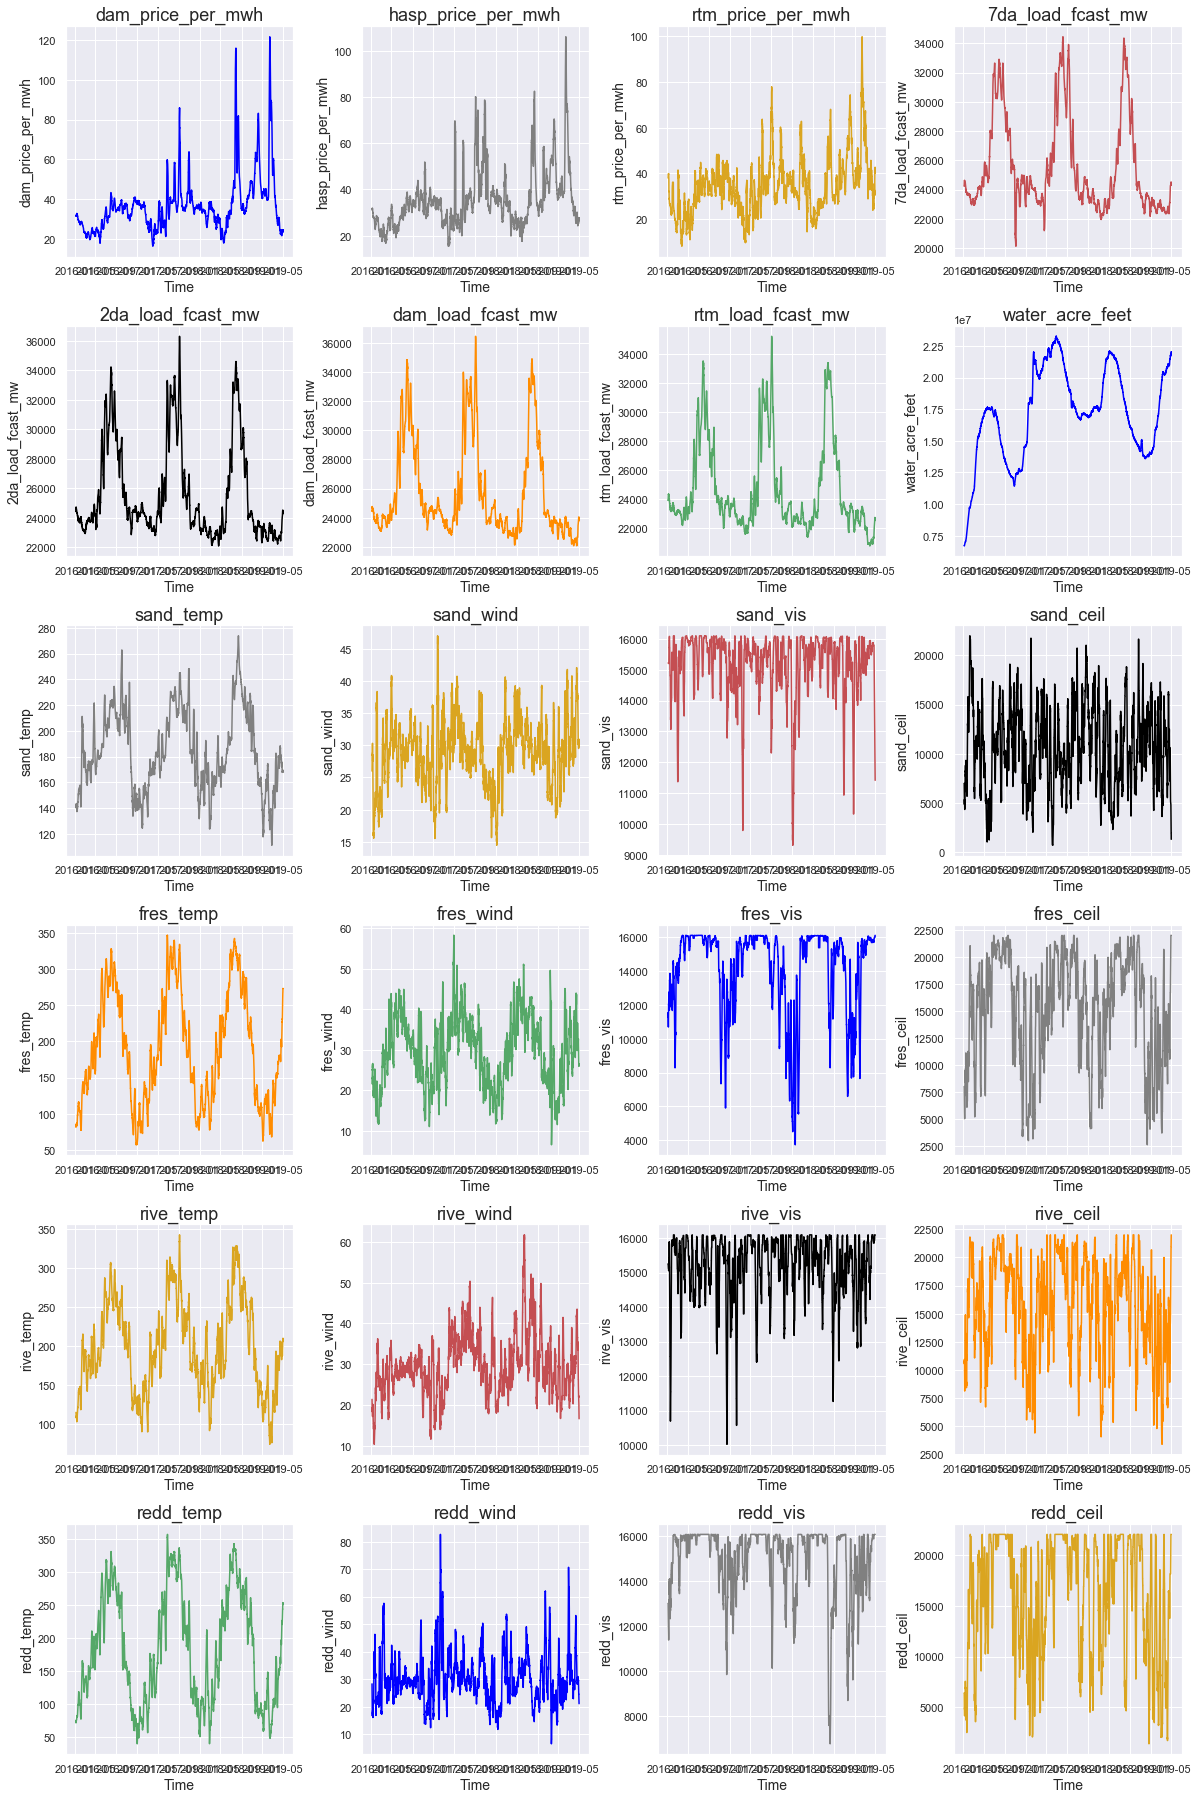

In [18]:
gen_linecharts_rolling(df, 24*7, items_to_plot, 4, '../images/all_feat_mv_avg.jpg')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dam_price_per_mwh,29067.0,3.678756e+01,2.700496e+01,-1.800327e+01,2.565615e+01,3.260930e+01,4.312426e+01,9.565324e+02
hasp_price_per_mwh,29067.0,3.557230e+01,3.955539e+01,-3.037555e+02,2.353672e+01,3.033813e+01,4.077948e+01,1.417416e+03
rtm_price_per_mwh,29067.0,3.458845e+01,4.764374e+01,-1.593338e+02,2.112412e+01,2.797191e+01,3.627047e+01,1.068389e+03
7da_load_fcast_mw,29067.0,2.557229e+04,4.950388e+03,8.048330e+03,2.194502e+04,2.481534e+04,2.770571e+04,4.880250e+04
2da_load_fcast_mw,29067.0,2.564308e+04,4.982761e+03,1.291546e+04,2.196727e+04,2.485242e+04,2.767989e+04,5.143127e+04
dam_load_fcast_mw,29067.0,2.579371e+04,5.028848e+03,1.695397e+04,2.214047e+04,2.501817e+04,2.777878e+04,5.100304e+04
rtm_load_fcast_mw,29067.0,2.473312e+04,4.937670e+03,1.517806e+04,2.107503e+04,2.404906e+04,2.677338e+04,4.914375e+04
water_acre_feet,29067.0,1.718265e+07,3.679748e+06,5.870433e+06,1.460728e+07,1.715570e+07,2.017440e+07,3.094972e+07
sand_temp,29067.0,1.846057e+02,4.092835e+01,5.000000e+01,1.560000e+02,1.830000e+02,2.110000e+02,3.780000e+02
sand_wind,29067.0,2.897000e+01,1.658065e+01,0.000000e+00,1.500000e+01,2.600000e+01,4.100000e+01,1.650000e+02


In [ ]:
# with open('../data/df_outliers_rem.pkl', 'wb') as f:
#     pickle.dump(df, f)